PySpark Join is used to combine two DataFrames and by chaining these you can join multiple DataFrames; it supports all basic join type operations available in traditional SQL like INNER, LEFT OUTER, RIGHT OUTER, LEFT ANTI, LEFT SEMI, CROSS, SELF JOIN. 

In [25]:
import pyspark
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('join').getOrCreate()


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/16 18:57:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


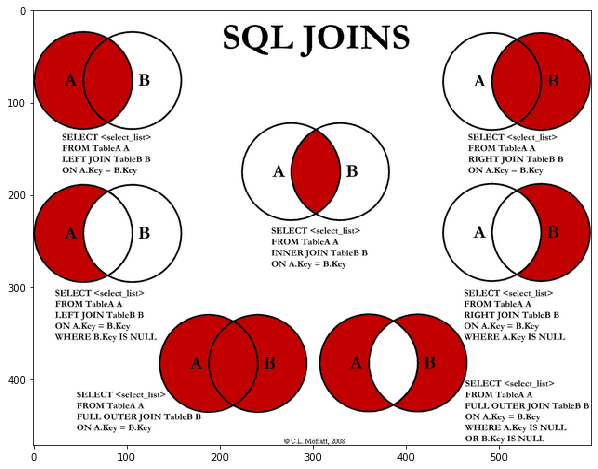

In [26]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
 
img = mpimg.imread('venn_join.png')
plt.figure(figsize = (10,8))
plt.imshow(img,interpolation='nearest', aspect='auto')


In [27]:
valuesA = [('Pirate',1),('Monkey',2),('Ninja',3),('Spaghetti',4)]
TableA = spark.createDataFrame(valuesA,['name','id'])
 
valuesB = [('Rutabaga',1),('Pirate',2),('Ninja',3),('Darth Vader',4)]
TableB = spark.createDataFrame(valuesB,['name','id'])
 
TableA.show()
TableB.show()

+---------+---+
|     name| id|
+---------+---+
|   Pirate|  1|
|   Monkey|  2|
|    Ninja|  3|
|Spaghetti|  4|
+---------+---+

+-----------+---+
|       name| id|
+-----------+---+
|   Rutabaga|  1|
|     Pirate|  2|
|      Ninja|  3|
|Darth Vader|  4|
+-----------+---+



### Inner join

In [35]:
ta = TableA.alias('ta')
tb = TableB.alias('tb')
## Pyspark Inner Join Example
inner_join = ta.join(tb, ta.name == tb.name)
inner_join.show()

+------+---+------+---+
|  name| id|  name| id|
+------+---+------+---+
| Ninja|  3| Ninja|  3|
|Pirate|  1|Pirate|  2|
+------+---+------+---+



### Left join

In [36]:
left_join = ta.join(tb, ta.name == tb.name,how='left') # Could also use 'left_outer'
left_join.show()

+---------+---+------+----+
|     name| id|  name|  id|
+---------+---+------+----+
|   Monkey|  2|  null|null|
|    Ninja|  3| Ninja|   3|
|   Pirate|  1|Pirate|   2|
|Spaghetti|  4|  null|null|
+---------+---+------+----+



In [34]:
left_join = tb.join(ta, tb.name == ta.name,how='left') # Could also use 'left_outer'
left_join.show()

+-----------+---+------+----+
|       name| id|  name|  id|
+-----------+---+------+----+
|Darth Vader|  4|  null|null|
|      Ninja|  3| Ninja|   3|
|     Pirate|  2|Pirate|   1|
|   Rutabaga|  1|  null|null|
+-----------+---+------+----+



### Pyspark Left Join and Filter Example

In [40]:
left_join = ta.join(tb, ta.name == tb.name,how='left') # Could also use 'left_outer'
left_join.filter(left_join['tb.name'].isNull()).show()
left_join.filter(left_join['tb.name'].isNotNull()).show()

+---------+---+----+----+
|     name| id|name|  id|
+---------+---+----+----+
|   Monkey|  2|null|null|
|Spaghetti|  4|null|null|
+---------+---+----+----+

+------+---+------+---+
|  name| id|  name| id|
+------+---+------+---+
| Ninja|  3| Ninja|  3|
|Pirate|  1|Pirate|  2|
+------+---+------+---+



### Pyspark Right Join Example

In [55]:
right_join = ta.join(tb, ta.name == tb.name,how='right') # Could also use 'right_outer'
right_join.sort(tb["id"].asc()).show()

+------+----+-----------+---+
|  name|  id|       name| id|
+------+----+-----------+---+
|  null|null|   Rutabaga|  1|
|Pirate|   1|     Pirate|  2|
| Ninja|   3|      Ninja|  3|
|  null|null|Darth Vader|  4|
+------+----+-----------+---+



### Pyspark Full Outer Join Example

In [56]:
full_outer_join = ta.join(tb, ta.name == tb.name,how='full') # Could also use 'full_outer'
full_outer_join.sort(ta["id"].desc()).show()

+---------+----+-----------+----+
|     name|  id|       name|  id|
+---------+----+-----------+----+
|Spaghetti|   4|       null|null|
|    Ninja|   3|      Ninja|   3|
|   Monkey|   2|       null|null|
|   Pirate|   1|     Pirate|   2|
|     null|null|Darth Vader|   4|
|     null|null|   Rutabaga|   1|
+---------+----+-----------+----+

